<a href="https://colab.research.google.com/github/Gisg22/Time_series_analysis_IoT/blob/main/Time_series_analysis_IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import os

In [ ]:
import kagglehub
path = kagglehub.dataset_download("joebeachcapital/real-time-internet-of-things-rt-iot2022")

100%|██████████| 7.29M/7.29M [00:00<00:00, 63.4MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/real-time-internet-of-things-rt-iot2022/versions/2


In [ ]:
print("Содержимое директории:", os.listdir(path))

Содержимое директории: ['RT_IOT2022.csv', 'rt-iot2022']


In [ ]:
file_path = os.path.join(path, 'RT_IOT2022.csv')
pd_iot = pd.read_csv(file_path)

In [ ]:
pd_iot.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [ ]:
pd_iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Attack_type', 'proto', 'service']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    pd_iot[column] = label_encoder.fit_transform(pd_iot[column])

In [ ]:
pd_iot.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,1,5,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,3
1,1,51143,1883,1,5,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,3
2,2,44761,1883,1,5,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,3
3,3,60893,1883,1,5,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,3
4,4,51087,1883,1,5,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,3


In [ ]:
missing_values = pd_iot.isnull().sum()
missing_values

,0
Unnamed: 0,0
id.orig_p,0
id.resp_p,0
proto,0
service,0
...,...
idle.std,0
fwd_init_window_size,0
bwd_init_window_size,0
fwd_last_window_size,0


In [ ]:
scaler = MinMaxScaler()
numerical_columns = pd_iot.drop(columns=['Attack_type']).columns
pd_iot[numerical_columns] = scaler.fit_transform(pd_iot[numerical_columns])
pd_iot.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0.000000,0.590021,0.028797,0.5,0.555556,0.001473,0.002071,0.000494,0.00069,0.000297,...,0.0,0.099097,0.099097,0.001418,0.099097,0.0,0.98024,0.409659,0.00766,3
1,0.000011,0.780392,0.028797,0.5,0.555556,0.001467,0.002071,0.000494,0.00069,0.000297,...,0.0,0.099518,0.099518,0.001424,0.099518,0.0,0.98024,0.409659,0.00766,3
2,0.000021,0.683009,0.028797,0.5,0.555556,0.001478,0.002071,0.000494,0.00069,0.000297,...,0.0,0.099474,0.099474,0.001423,0.099474,0.0,0.98024,0.409659,0.00766,3
3,0.000032,0.929168,0.028797,0.5,0.555556,0.001471,0.002071,0.000494,0.00069,0.000297,...,0.0,0.099713,0.099713,0.001427,0.099713,0.0,0.98024,0.409659,0.00766,3
4,0.000042,0.779538,0.028797,0.5,0.555556,0.001468,0.002071,0.000494,0.00069,0.000297,...,0.0,0.099382,0.099382,0.001422,0.099382,0.0,0.98024,0.409659,0.00766,3


In [ ]:
correlation_matrix = pd_iot.corr()

In [ ]:
correlation_matrix

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
Unnamed: 0,1.000000,0.016951,-0.219485,-0.369675,-0.403928,-0.033754,-0.064143,-0.035444,-0.027248,-0.028472,...,-0.018338,-0.208817,-0.209388,-0.032944,-0.210371,-0.048127,-0.364625,-0.307239,-0.129325,-0.365485
id.orig_p,0.016951,1.000000,0.168818,0.243147,0.244634,0.019978,0.040027,0.021090,0.017724,0.017749,...,0.003530,0.120457,0.120340,0.019328,0.121083,0.028181,0.206620,0.178322,0.075855,0.224346
id.resp_p,-0.219485,0.168818,1.000000,0.288885,0.000078,0.012719,0.005481,-0.004072,0.001625,-0.001290,...,-0.000370,0.022867,0.022367,0.012528,0.022665,0.000354,0.036895,-0.011118,0.128522,0.305570
proto,-0.369675,0.243147,0.288885,1.000000,0.194948,0.006364,0.013220,0.002367,0.026652,0.013742,...,-0.013294,-0.054091,-0.052791,0.005337,-0.053894,-0.007549,-0.109719,-0.091776,-0.039976,0.299092
service,-0.403928,0.244634,0.000078,0.194948,1.000000,0.075041,0.151937,0.093331,0.049449,0.068844,...,0.029690,0.503461,0.511558,0.075340,0.512246,0.140309,0.787188,0.789262,-0.002018,0.269596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
idle.std,-0.048127,0.028181,0.000354,-0.007549,0.140309,0.112170,0.115612,0.107515,0.051228,0.094403,...,0.042978,0.136860,0.327387,0.115919,0.243595,1.000000,0.115768,0.163924,0.004764,-0.014745
fwd_init_window_size,-0.364625,0.206620,0.036895,-0.109719,0.787188,0.057173,0.132710,0.079270,0.035651,0.053777,...,0.031844,0.552291,0.550056,0.056422,0.554487,0.115768,1.000000,0.834001,0.323171,0.311407
bwd_init_window_size,-0.307239,0.178322,-0.011118,-0.091776,0.789262,0.060731,0.147478,0.104156,0.046718,0.072643,...,0.049145,0.488590,0.499738,0.060308,0.498399,0.163924,0.834001,1.000000,-0.002234,0.178757
fwd_last_window_size,-0.129325,0.075855,0.128522,-0.039976,-0.002018,0.003591,0.008330,0.012885,-0.003717,0.011146,...,0.011612,-0.001563,-0.000078,0.002898,-0.000748,0.004764,0.323171,-0.002234,1.000000,0.155755


In [ ]:
corr_with_target = correlation_matrix['Attack_type'].sort_values(ascending=False)
corr_with_target

,Attack_type
Attack_type,1.000000
flow_FIN_flag_count,0.408962
fwd_URG_flag_count,0.324308
fwd_init_window_size,0.311407
id.resp_p,0.305570
...,...
payload_bytes_per_second,-0.296198
Unnamed: 0,-0.365485
fwd_pkts_payload.avg,-0.569125
fwd_pkts_payload.min,-0.604627


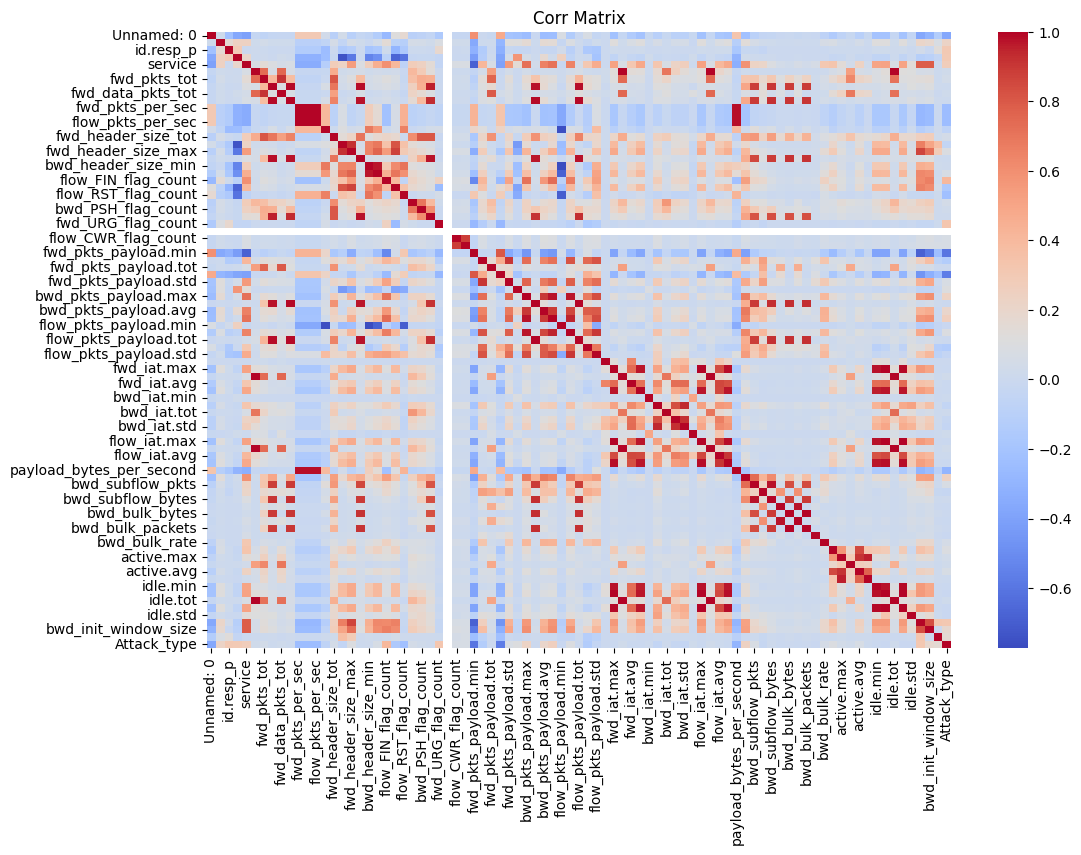

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Corr Matrix')
plt.show()

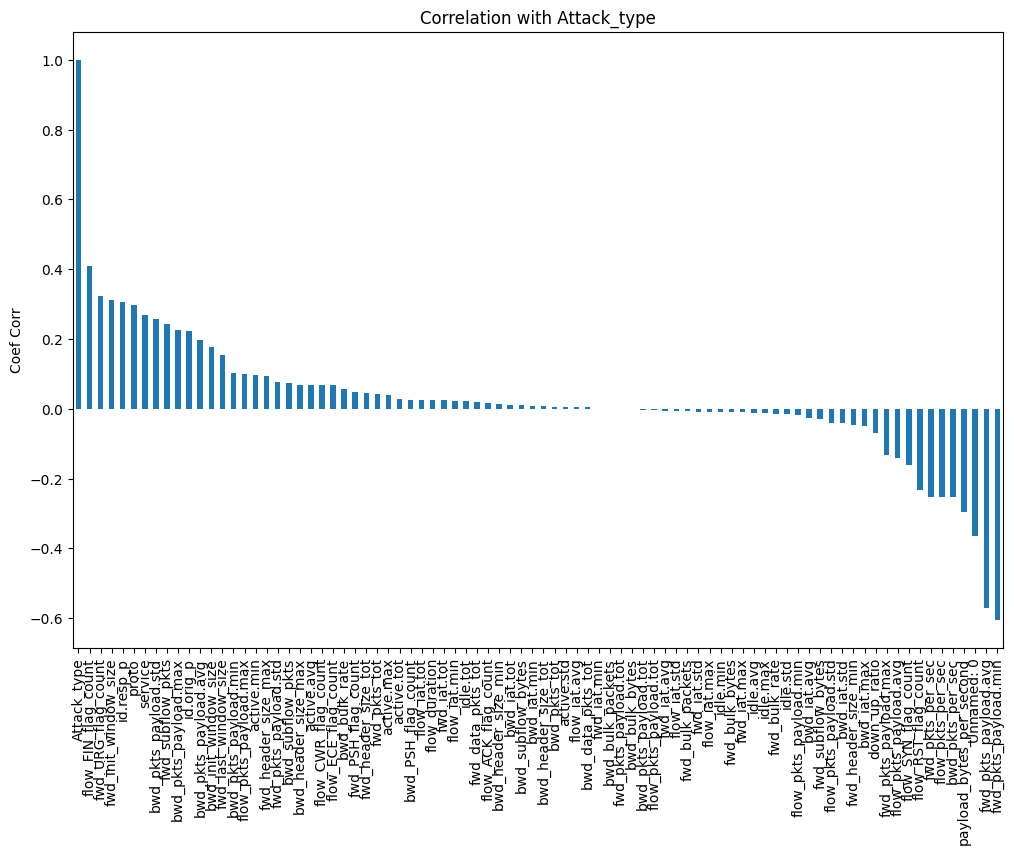

In [ ]:
plt.figure(figsize=(12, 8))
corr_with_target[:-1].plot(kind='bar', title='Correlation with Attack_type')
plt.ylabel('Coef Corr')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = pd_iot.drop(columns=['Attack_type'])
y = pd_iot['Attack_type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X shape{X_train.shape}, y shape{y_train.shape}')

X shape(98493, 84), y shape(98493,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1578
           1       0.99      0.99      0.99       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       1.00      0.83      0.91         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       1.00      0.99      0.99      1625
          11       1.00      0.93      0.96        58

    accuracy                           1.00     24624
   macro avg       1.00      0.95      0.97     24624
weighted avg       1.00      1.00      1.00     24624

Accuracy: 1.00


In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(rf_model, X, y, cv=5, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Avarage Accuracy:", np.mean(cv_results['test_accuracy']))
print("Avarage F1-Score:", np.mean(cv_results['test_f1_macro']))
print("Avarage Precision:", np.mean(cv_results['test_precision_macro']))
print("Avarage Recall:", np.mean(cv_results['test_recall_macro']))

Avarage Accuracy: 0.9925357173703822
Avarage F1-Score: 0.9306177958182221
Avarage Precision: 0.9569765780465342
Avarage Recall: 0.9320153784665404


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1578
           1       0.98      1.00      0.99       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.71      0.83      0.77         6
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       1.00      0.98      0.99        58

    accuracy                           1.00     24624
   macro avg       0.94      0.95      0.95     24624
weighted avg       1.00      1.00      1.00     24624



In [ ]:
print(f"Точность (Accuracy): {accuracy_score(y_test, y_pred_xgb):.2f}")

Точность (Accuracy): 1.00


In [ ]:
cv_results_xgb = cross_validate(xgb_model, X, y, cv=5, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Avarage Accuracy:", np.mean(cv_results_xgb['test_accuracy']))
print("Avarage F1-Score:", np.mean(cv_results_xgb['test_f1_macro']))
print("Avarage Precision:", np.mean(cv_results_xgb['test_precision_macro']))
print("Avarage Recall:", np.mean(cv_results_xgb['test_recall_macro']))

Avarage Accuracy: 0.9449479828985494
Avarage F1-Score: 0.8867334104878551
Avarage Precision: 0.907695769928927
Avarage Recall: 0.905940532320695


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_macro', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=1)

In [ ]:
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
print("Classification report for test sample:")
print(classification_report(y_test, y_pred))

Classification report for test sample:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1578
           1       0.99      0.99      0.99       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.98      0.99       489
           9       1.00      0.99      1.00       384
          10       1.00      0.99      0.99      1625
          11       1.00      0.98      0.99        58

    accuracy                           1.00     24624
   macro avg       0.98      0.95      0.96     24624
weighted avg       1.00      1.00      1.00     24624



In [49]:
cv_results_xgb = cross_validate(best_xgb_model, X, y, cv=5, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Avarage Accuracy:", np.mean(cv_results_xgb['test_accuracy']))
print("Avarage F1-Score:", np.mean(cv_results_xgb['test_f1_macro']))
print("Avarage Precision:", np.mean(cv_results_xgb['test_precision_macro']))
print("Avarage Recall:", np.mean(cv_results_xgb['test_recall_macro']))

Avarage Accuracy: 0.9768843045260278
Avarage F1-Score: 0.8885830453495123
Avarage Precision: 0.9168433279829946
Avarage Recall: 0.9022044080289863


In [ ]:
from tensorflow.keras.optimizers import Adam

dnn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(y_train.unique()), activation='softmax')
])

dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9021 - loss: 0.3481 - val_accuracy: 0.9790 - val_loss: 0.0648
Epoch 2/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9751 - loss: 0.0733 - val_accuracy: 0.9862 - val_loss: 0.0459
Epoch 3/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9848 - loss: 0.0486 - val_accuracy: 0.9898 - val_loss: 0.0347
Epoch 4/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9899 - val_loss: 0.0294
Epoch 5/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9894 - loss: 0.0356 - val_accuracy: 0.9918 - val_loss: 0.0234
Epoch 6/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9902 - loss: 0.0307 - val_accuracy: 0.9919 - val_loss: 0.0232
Epoch 7/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9920 - loss: 0.0256 - val_accuracy: 0.9918 - val_loss: 0.0208
Epoch 8/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9914 - loss: 0.0255 

In [44]:
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy on test: {test_accuracy:.2f}")

Accuracy on test: 0.99


In [ ]:
pip install scikeras

In [38]:
from scikeras.wrappers import KerasClassifier

def create_dnn_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

dnn_model_wrapped = KerasClassifier(model=create_dnn_model, epochs=20, batch_size=32, verbose=0)

cv_results = cross_validate(dnn_model_wrapped, X, y, cv=5, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])

print("Avarage Accuracy:", np.mean(cv_results['test_accuracy']))
print("Avarage F1-Score:", np.mean(cv_results['test_f1_macro']))
print("Avarage Precision:", np.mean(cv_results['test_precision_macro']))
print("Avarage Recall:", np.mean(cv_results['test_recall_macro']))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Avarage Accuracy: 0.9872237572614522
Avarage F1-Score: 0.9111290752349767
Avarage Precision: 0.92545968753466
Avarage Recall: 0.9187592731428227


In [41]:
print("Shape of X_train:", X_train.shape)
print("Sequence length:", sequence_length)
print("Total features:", X_train.shape[1])
print("Is divisible:", X_train.shape[1] % sequence_length == 0)

Shape of X_train: (98493, 84)
Sequence length: 10
Total features: 84
Is divisible: False


In [42]:
sequence_length = 4
X_train_seq = np.reshape(X_train.values, (X_train.shape[0], sequence_length, -1))
X_test_seq = np.reshape(X_test.values, (X_test.shape[0], sequence_length, -1))

lstm_model = Sequential([
    LSTM(64, activation='tanh', input_shape=(sequence_length, X_train.shape[1] // sequence_length), return_sequences=True),
    LSTM(32, activation='tanh', return_sequences=False),
    Dense(len(y_train.unique()), activation='softmax')
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_lstm = lstm_model.fit(X_train_seq, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8745 - loss: 0.4473 - val_accuracy: 0.9601 - val_loss: 0.0886
Epoch 2/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9624 - loss: 0.0846 - val_accuracy: 0.9646 - val_loss: 0.0730
Epoch 3/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9736 - loss: 0.0638 - val_accuracy: 0.9591 - val_loss: 0.0828
Epoch 4/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9815 - loss: 0.0498 - val_accuracy: 0.9868 - val_loss: 0.0375
Epoch 5/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9860 - val_loss: 0.0461
Epoch 6/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9890 - loss: 0.0332 - val_accuracy: 0.9882 - val_loss: 0.0296
Epoch 7/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9899 - loss: 0.0294 - val_accuracy: 0.9906 - val_loss: 0.0288
Epoch 8/20
2463/2463 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9902 - loss: 0

In [48]:
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_test_seq, y_test, verbose=0)
print(f"Accuracy LSTM: {test_accuracy_lstm:.2f}")

Accuracy LSTM: 0.99


In [53]:
equence_length = 4
num_features_per_step = X.shape[1] // sequence_length
X_reshaped = np.reshape(X.values, (X.shape[0], sequence_length, num_features_per_step))

def create_lstm_model():
    model = Sequential([
        LSTM(64, activation='tanh', input_shape=(sequence_length, num_features_per_step), return_sequences=True),
        LSTM(32, activation='tanh', return_sequences=False),
        Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Обертка для модели
lstm_model_wrapped = KerasClassifier(model=create_lstm_model, epochs=20, batch_size=32, verbose=0)

# Кросс-валидация
cv_results = cross_validate(lstm_model_wrapped, X_reshaped, y, cv=5, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])

# Результаты
print("Avarage Accuracy:", np.mean(cv_results['test_accuracy']))
print("Avarage F1-Score:", np.mean(cv_results['test_f1_macro']))
print("Avarage Precision:", np.mean(cv_results['test_precision_macro']))
print("Avarage Recall:", np.mean(cv_results['test_recall_macro']))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

Avarage Accuracy: 0.9884664206012239
Avarage F1-Score: 0.8989292650545551
Avarage Precision: 0.9287932094513696
Avarage Recall: 0.9065191792936412


In [54]:
data = {
    'Model': ['Random Forest', 'XGBoost', 'DNN', 'LSTM'],
    'Accuracy': [0.9925357173703822,  0.9768843045260278, 0.9872237572614522, 0.9884664206012239],
    'F1-Score': [0.9306177958182221, 0.8885830453495123, 0.9111290752349767, 0.8989292650545551],
    'Precision': [0.9569765780465342, 0.9168433279829946, 0.92545968753466, 0.9287932094513696],
    'Recall': [0.9320153784665404,  0.9022044080289863, 0.9187592731428227, 0.9065191792936412],
}

comparison_df = pd.DataFrame(data)
comparison_df

,Model,Accuracy,F1-Score,Precision,Recall
0,Random Forest,0.992536,0.930618,0.956977,0.932015
1,XGBoost,0.976884,0.888583,0.916843,0.902204
2,DNN,0.987224,0.911129,0.925460,0.918759
3,LSTM,0.988466,0.898929,0.928793,0.906519


770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


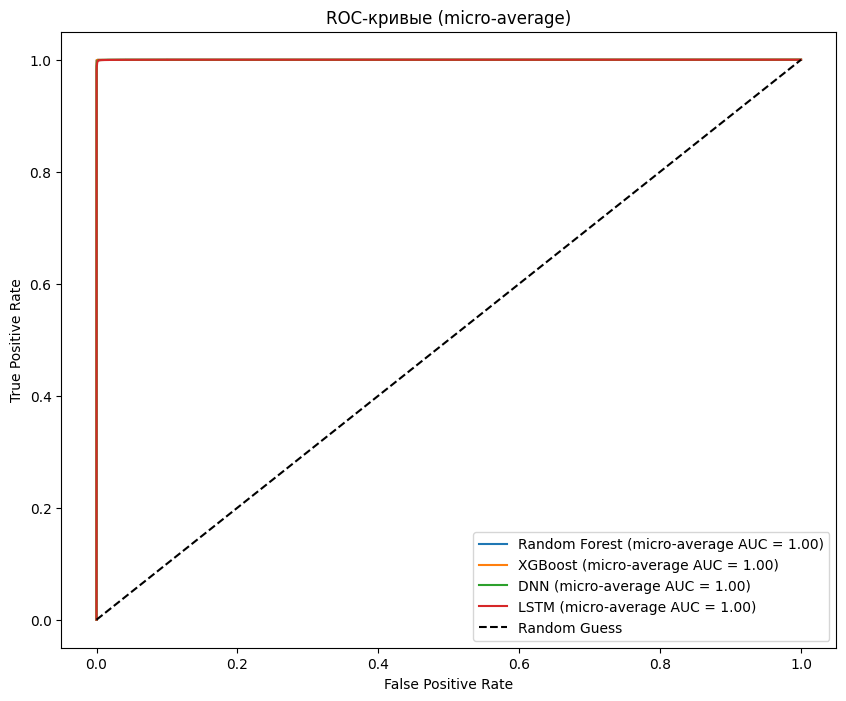

In [59]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

rf_pred_prob = rf_model.predict_proba(X_test)
xgb_pred_prob = best_xgb_model.predict_proba(X_test)
dnn_pred_prob = dnn_model.predict(X_test)
lstm_pred_prob = lstm_model.predict(X_test_seq)

models_predictions = {
    'Random Forest': rf_pred_prob,
    'XGBoost': xgb_pred_prob,
    'DNN': dnn_pred_prob,
    'LSTM': lstm_pred_prob
}

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 8))

for model_name, y_pred_prob in models_predictions.items():
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (micro-average AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые (micro-average)')
plt.legend(loc='lower right')
plt.show()